## Defining the Question
The aviation accidents dataset will aid in our goal of understanding the underlying factors contributing to accidents and identify patterns that can help in predicting and preventing future accidents.

## Understanding the Context
Understanding the factors leading to aviation accidents is crucial for developing safety strategies. Analyzing 
historical accident data can help identify patterns and risk factors, leading to improved safety protocols and preventive measures.




## Recording the Experimental Design
Data Collection: Obtain historical aviation accident data.
Data Cleaning: Handle missing values, outliers, and inconsistent data.
Exploratory Data Analysis (EDA): Analyze the data distribution and relationships.
Feature Engineering: Create new features based on accident characteristics.
Predictive Modeling: Apply machine learning algorithms to predict accident risk.
Evaluation: Assess model performance using metrics such as accuracy, precision, recall, and F1-score.
Action Plan: Provide recommendations for safety improvements.

In [251]:
#Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline


In [252]:
# using pandas to load csv file
df = pd.read_csv("AviationData.csv",low_memory = False)
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,24/10/1948,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,19/07/1962,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19/09/1996
2,20061025X01555,Accident,NYC07LA005,30/08/1974,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26/02/2007
3,20001218X45448,Accident,LAX96LA321,19/06/1977,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12/09/2000
4,20041105X01764,Accident,CHI79FA064,02/08/1979,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16/04/1980


In [253]:
df.shape

(88889, 31)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [194]:
 #List of data's columns
df.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [195]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Printing duplicate rows if any
if not duplicate_rows.empty:
    print("Duplicate Rows:")
    print(duplicate_rows)
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [196]:
#checking for missing values in each column
missing_values = df.isnull().any()
missing_values

Event.Id                  False
Investigation.Type        False
Accident.Number           False
Event.Date                False
Location                   True
Country                    True
Latitude                   True
Longitude                  True
Airport.Code               True
Airport.Name               True
Injury.Severity            True
Aircraft.damage            True
Aircraft.Category          True
Registration.Number        True
Make                       True
Model                      True
Amateur.Built              True
Number.of.Engines          True
Engine.Type                True
FAR.Description            True
Schedule                   True
Purpose.of.flight          True
Air.carrier                True
Total.Fatal.Injuries       True
Total.Serious.Injuries     True
Total.Minor.Injuries       True
Total.Uninjured            True
Weather.Condition          True
Broad.phase.of.flight      True
Report.Status              True
Publication.Date           True
dtype: b

In [214]:
#Checking for the total number of missing per each column
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
Purpose.of.flight          6192
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: int64

In [255]:
# Dropping columns with  more than 50% of the values are missing
threshold = len(df) * 0.5
df.dropna(thresh=threshold, axis=1, inplace=True)

In [256]:
df.shape

(88889, 25)

## Exploratory Analysis

In [266]:
#displaying different purposes of flight
Flight_purpose = df["Purpose.of.flight"].unique()
Flight_purpose

array(['Personal', nan, 'Business', 'Instructional', 'Unknown', 'Ferry',
       'Executive/corporate', 'Aerial Observation', 'Aerial Application',
       'Public Aircraft', 'Skydiving', 'Other Work Use', 'Positioning',
       'Flight Test', 'Air Race/show', 'Air Drop',
       'Public Aircraft - Federal', 'Glider Tow',
       'Public Aircraft - Local', 'External Load',
       'Public Aircraft - State', 'Banner Tow', 'Firefighting',
       'Air Race show', 'PUBS', 'ASHO', 'PUBL'], dtype=object)

In [258]:
#displaying the unique make
unique_make = df["Make"].unique()
unique_make
                                

array(['Stinson', 'Piper', 'Cessna', ..., 'JAMES R DERNOVSEK',
       'ORLICAN S R O', 'ROYSE RALPH L'], dtype=object)

In [259]:
#displaying the unique Models
unique_model = df["Model"].unique()
unique_model

array(['108-3', 'PA24-180', '172M', ..., 'ROTORWAY EXEC 162-F',
       'KITFOX S5', 'M-8 EAGLE'], dtype=object)

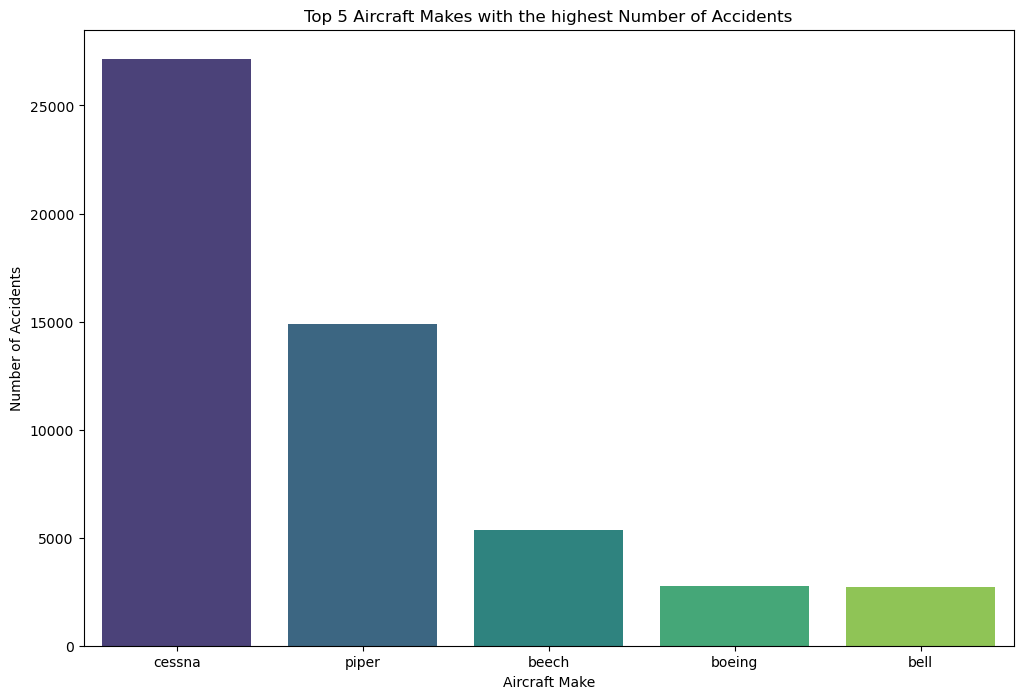

In [242]:

accident_counts = df.groupby('Make').size().reset_index(name='accident_count')

df['Make'] = df['Make'].str.lower()
#normalizing the make column to achieve  consisitency

# Sort the counts in descending order and select the top 5 makes
top_10_accidents = accident_counts.sort_values(by='accident_count', ascending=False).head(5)

# Ploting  the bar chart for the top 5 aircraft makes with the most accidents
plt.figure(figsize=(12, 8))
sns.barplot(x='Make', y='accident_count', data=top_10_accidents, palette='viridis',hue="Make",legend = False)
plt.title('Top 5 Aircraft Makes with the highest Number of Accidents')
plt.xlabel('Aircraft Make')
plt.ylabel('Number of Accidents')
plt.show()

From the bar chart cessna had the highest number of accidents of the listed aircraft makes.The reasons could likely be a combination of their popularity, the large number of aircraft in operation, their use in training environments, and comprehensive incident reporting. While this highlights a higher number of accidents, it does not necessarily mean that Cessna aircraft are less safe compared to others; rather, it reflects their extensive use and presence in the aviation industry.

In [202]:
# cheking for unique weather conditions 
unique = df["Weather.Condition"].unique()
unique

array(['UNK', 'IMC', 'VMC', nan, 'Unk'], dtype=object)

In [260]:
df['Weather.Condition'] = df['Weather.Condition'].str.upper()
#Now, let's check the unique counts again
unique_counts = df["Weather.Condition"].value_counts(dropna=False)
unique_counts

Weather.Condition
VMC    77303
IMC     5976
NaN     4492
UNK     1118
Name: count, dtype: int64

In [261]:
# Replace 'Unknown' with 'UNK' in the 'Weather.Condition' column (case-insensitive)
df['Weather.Condition'] = df['Weather.Condition'].str.replace('Unknown', 'UNK', case=False)

# Now, let's check the unique counts again
Weather_Cleaned = df["Weather.Condition"].value_counts(dropna=True)
print(Weather_Cleaned)

Weather.Condition
VMC    77303
IMC     5976
UNK     1118
Name: count, dtype: int64


VMC stands for Visual Meteorological Conditions. It refers to weather conditions where visibility is good enough for pilots to operate an aircraft primarily by visual reference to the ground, landmarks, and other aircraft.
UNK: Unknown - The weather condition for the specific accident/incident is unknown or unspecified.
IMC: Instrument Meteorological Conditions - Similar to IFR, indicating conditions where pilots must rely on instruments due to poor visibility or adverse weather.

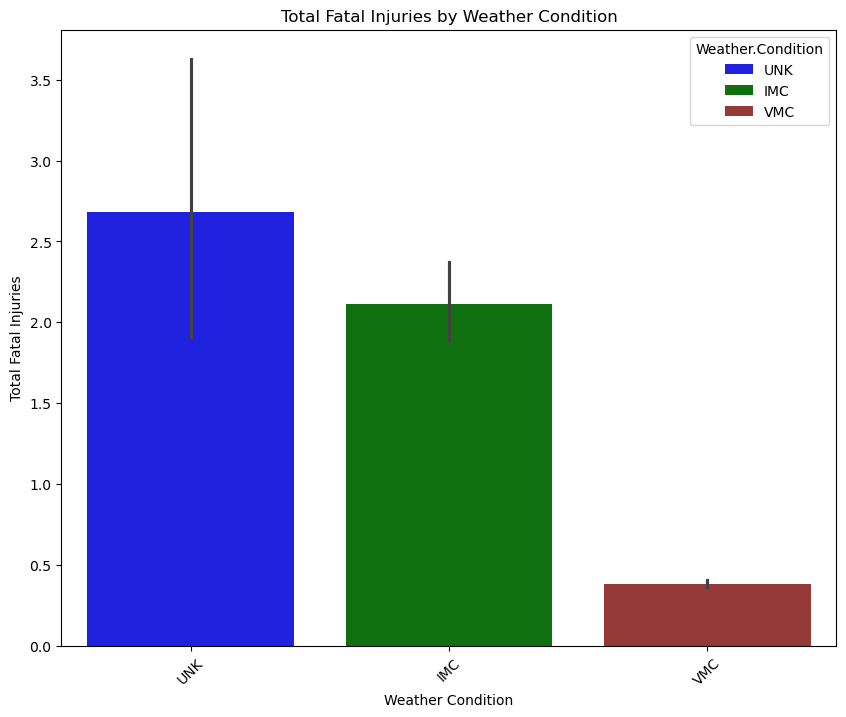

In [262]:
# Exploring relationships between weather condition and total fatalities using a bar graph
# Defining a color palette for the bars
colors = ['blue', 'green', 'brown']
plt.figure(figsize=(10, 8))
sns.barplot(x='Weather.Condition', y='Total.Fatal.Injuries', data=df, palette=colors, hue='Weather.Condition', dodge=False)
plt.title('Total Fatal Injuries by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Fatal Injuries')
plt.xticks(rotation=45)

plt.show()

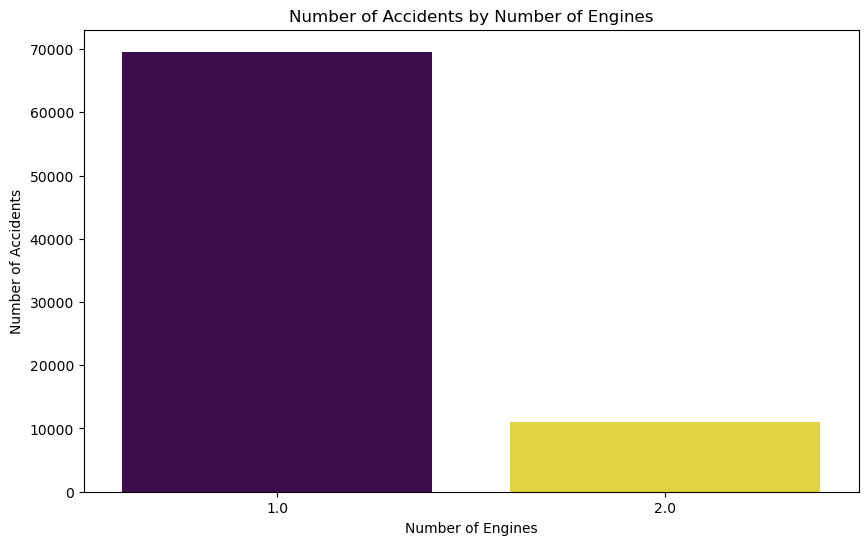

In [247]:
filtered_df = df[df['Number.of.Engines'].isin([1, 2])]

# Aggregate the data to count the number of accidents for each number of engines
engine_accident_counts = filtered_df.groupby('Number.of.Engines').size().reset_index(name='accident_count')

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Number.of.Engines', y='accident_count', data=engine_accident_counts, palette='viridis',hue="Number.of.Engines" ,dodge=False, legend=False)
plt.title('Number of Accidents by Number of Engines')
plt.xlabel('Number of Engines')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)  # No rotation needed for two bars
plt.show()


In [ ]:
From the above data aircraft with single engine seems to have more accident with approximately 69000 number of accidents 
compared to twin engines at only 10,000 cases.

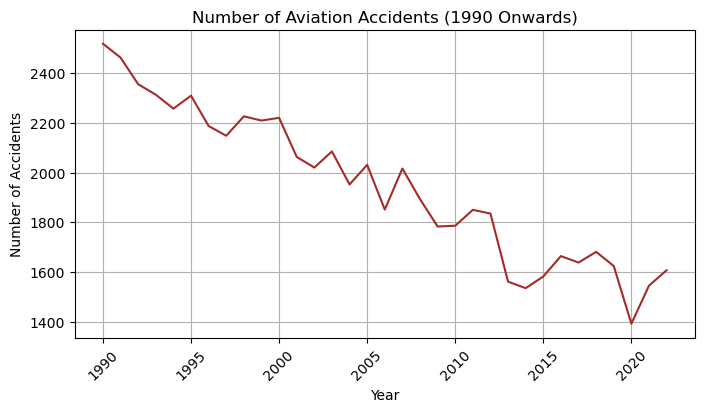

In [264]:

# Convert 'Event.Date' column to datetime format

df['Event.Date'] = pd.to_datetime(df['Event.Date'], format='%d/%m/%Y', errors='coerce')

# Filter data for years from 1990 onwards
df_filtered = df[df['Event.Date'].dt.year >= 1990]

# Count the number of accidents by year
accidents_by_year = df_filtered['Event.Date'].dt.year.value_counts().sort_index()

# Plot the number of accidents over time
plt.figure(figsize=(8, 4))
plt.plot(accidents_by_year.index, accidents_by_year.values, linestyle='-',  color='brown')
plt.title('Number of Aviation Accidents (1990 Onwards)')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


The number of accidents reduced gradually from the year 1990 at about 2550 to the all time low in 2020 at 1400. Historically, 
the deadliest crash of this year was an unusual incident: in the Guangzhou Baiyun aircraft collisions, which occurred on 2 October in Guangzhou, China, 128 people were killed when a hijacked Boeing 737 struck two other aircraft during an emergency landing in which the hijacker attempted to gain control of the aircraft.
Same year Indian Airlines Flight 605 was a scheduled domestic passenger flight from Bombay to Bangalore. On 14 February 1990, an Airbus A320-231 registered as VT-EPN, crashed onto a golf course while attempting to land at Bangalore, killing 92 of 146 people on board.

In this data science project, we conducted a comprehensive analysis of aviation accident data to uncover critical insights
and patterns. Our primary focus was on identifying the factors contributing to fatal injuries and the frequency of accidents
across different aircraft makes and models